# Imports et lecture des fichiers disponibles

In [1]:
import numpy as np 
import pandas as pd 
import io
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
import os

%matplotlib inline

chemin = 'C:\\Users\\Sdis59\\Documents\\OpenClassroom\\scoring\\Data\\home-credit-default-risk\\'
for fichiers in os.listdir(chemin) :
    print(fichiers)

    

application_test.csv
application_train.csv
bureau.csv
bureau_balance.csv
credit_card_balance.csv
df_pour_modélisation.csv
HomeCredit_columns_description.csv
installments_payments.csv
POS_CASH_balance.csv
previous_application.csv
sample_submission.csv


In [2]:
liste_csv = ['sample_submission.csv', 
             'bureau_balance.csv',
             'POS_CASH_balance.csv',
             'application_train.csv',
             'HomeCredit_columns_description.csv',
             'application_test.csv',
             'previous_application.csv',
             'credit_card_balance.csv',
             'installments_payments.csv',
             'bureau.csv']

liste_clefs_df = ['sample_submission', 
                  'bureau_balance',
                  'POS_CASH_balance',
                  'application_train',
                  'HomeCredit_columns_description',
                  'application_test',
                  'previous_application',
                  'credit_card_balance',
                  'installments_payments',
                  'bureau']

dictionnaire_df = {}

Lecture des fichiers csv, confection des df et du dictionnaire.

In [3]:
for clef, csv in zip(liste_clefs_df,
                     liste_csv) :
    print('Traitement de ' + csv)
    dictionnaire_df[clef] = pd.read_csv(chemin + csv, 
                                        sep = ',',
                                        encoding = 'unicode_escape')
    print(csv, ' traité.')

Traitement de sample_submission.csv
sample_submission.csv  traité.
Traitement de bureau_balance.csv
bureau_balance.csv  traité.
Traitement de POS_CASH_balance.csv
POS_CASH_balance.csv  traité.
Traitement de application_train.csv
application_train.csv  traité.
Traitement de HomeCredit_columns_description.csv
HomeCredit_columns_description.csv  traité.
Traitement de application_test.csv
application_test.csv  traité.
Traitement de previous_application.csv
previous_application.csv  traité.
Traitement de credit_card_balance.csv
credit_card_balance.csv  traité.
Traitement de installments_payments.csv
installments_payments.csv  traité.
Traitement de bureau.csv
bureau.csv  traité.


# Description des jeux de données

On dispose de 10 fichiers csv :

**application_train et application_test.csv :**

Table principale. La table train est dotée de cibles (TARGET).
Une ligne correspond à un prêt;

**bureau.csv :**

On y trouve tous les crédits provenants d'autres institutions financières dès lors qu'ils ont été enregistré au bureau des crédits (pour les clients ayant un prêt dans notre échantillon).
Pour chaque emprunt de l'échantillon il y a autant de lignes que le client a de crédits enregistrés avant la demande en question;
    
**bureau_balance.csv :**

Balances mensuelles des crédits précédents au bureau des crédits.
Dans cette table, une ligne est présente pour chaque mois de l'historique de chaque crédit enregistré. Une ligne contient :
   * Le nombre demprunts dans l'échantillon;
   * Le nombre d'emprunts précédents concernés;
   * Le nombre de mois d'historique disponibles pour les crédits sus-mentionnés;
   
**POS_CASH_balance.csv :**
 
Vue des prêts en espèces et des points de ventes (POS point of sales), que le demandeur a avec Homme Credit.

On trouve une ligne par mois pour chaque emprunt avec Homme Credit (crédits à la consommation et prêts en espèces)dans l'échantillon. Une ligne contient :
   * Le nombre demprunts dans l'échantillon;
   * Le nombre d'emprunts précédents concernés;
   * Le nombre de mois d'historique disponibles pour les crédits sus-mentionnés;

**credit_card_balance.csv**

Vue des cartes de crédit que le demandeur a avec Homme Credit.

On trouve une ligne par mois pour chaque emprunt avec Homme Credit (crédits à la consommation et prêts en espèces)dans l'échantillon. Une ligne contient :
   * Le nombre demprunts dans l'échantillon;
   * Le nombre de cartes de crédit précédemment possédées;
   * Le nombre de mois d'historique disponibles pour les cartes de crédit sus-mentionnés;

**previous_application.csv**

Toutes les demandes pour des emprunts auprès de Home Credit des clients possédant des crédits dans l'échantillon.

Une ligne figure pour chaque demande relative à un emprunt dans notre échantillon.

**installments_payments.csv**

Historique des remboursements des emprunts de Home Credit disponibles dans l'échantillon.

Il ya une ligne pour chaque mensualité payée et une ligne pour chaque mensualité manquante.

Une ligne équivaut à un versement d'une mensualité ou à une mensualité d'un emprunt précédent dans les prêts de Home Credit disponibles dans l'échantillon;

**HomeCredit_columns_description.csv**

Description des colonnes des fichiers.

Les liens entre les tables sont les suivants :


![Relations entre les tables](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png

**Etude des df**

In [4]:
for clef, df in dictionnaire_df.items() :
    print(f'{clef} : {df.shape}')

sample_submission : (48744, 2)
bureau_balance : (27299925, 3)
POS_CASH_balance : (10001358, 8)
application_train : (307511, 122)
HomeCredit_columns_description : (219, 5)
application_test : (48744, 121)
previous_application : (1670214, 37)
credit_card_balance : (3840312, 23)
installments_payments : (13605401, 8)
bureau : (1716428, 17)


In [5]:
48744/307511

0.1585114028441259

On a un jeu test qui fait environ 16% des valeurs complétes.

Descripteur des colonnes 

In [6]:
les_définitions = dictionnaire_df['HomeCredit_columns_description']
for csv in les_définitions['Table'].unique() :
    print(csv + ':\n-----------------------------\n')
    le_df = les_définitions[les_définitions['Table'] == csv]
    for ligne, description, observation in le_df[['Row', 'Description', 'Special']].values :
        print(ligne, ' : ', description, '\nobservation :', observation, '\n')


application_{train|test}.csv:
-----------------------------

SK_ID_CURR  :  ID of loan in our sample 
observation : nan 

TARGET  :  Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases) 
observation : nan 

NAME_CONTRACT_TYPE  :  Identification if loan is cash or revolving 
observation : nan 

CODE_GENDER  :  Gender of the client 
observation : nan 

FLAG_OWN_CAR  :  Flag if the client owns a car 
observation : nan 

FLAG_OWN_REALTY  :  Flag if client owns a house or flat 
observation : nan 

CNT_CHILDREN  :  Number of children the client has 
observation : nan 

AMT_INCOME_TOTAL  :  Income of the client 
observation : nan 

AMT_CREDIT  :  Credit amount of the loan 
observation : nan 

AMT_ANNUITY  :  Loan annuity 
observation : nan 

AMT_GOODS_PRICE  :  For consumer loans it is the price of the goods for which the loan is given 
observation : nan 

NAM

Etude des clefs

In [7]:
liste_clefs_relationnelles = ['SK_ID_CURR',
                              'SK_ID_PREV',
                              'SK_ID_BUREAU']

In [8]:
for clef, df in dictionnaire_df.items() :
    print(clef + ' : ')
    print([col for col in df.columns if col in liste_clefs_relationnelles])
    print()

sample_submission : 
['SK_ID_CURR']

bureau_balance : 
['SK_ID_BUREAU']

POS_CASH_balance : 
['SK_ID_PREV', 'SK_ID_CURR']

application_train : 
['SK_ID_CURR']

HomeCredit_columns_description : 
[]

application_test : 
['SK_ID_CURR']

previous_application : 
['SK_ID_PREV', 'SK_ID_CURR']

credit_card_balance : 
['SK_ID_PREV', 'SK_ID_CURR']

installments_payments : 
['SK_ID_PREV', 'SK_ID_CURR']

bureau : 
['SK_ID_CURR', 'SK_ID_BUREAU']



In [9]:
dictionnaire_df['application_train']['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

On a un nombre dispropostionné de clients avec un défaut de paiement

In [10]:
24825/282686

0.08781828601345662

Comment se répartissent les champs numériques?

In [11]:
dictionnaire_df['HomeCredit_columns_description']

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


In [12]:
def trace_caractéristiques(la_table,
                           liste_champs,
                           binaires) :

    if binaires :
        if len(liste_champs) > 1 and len(liste_champs) <= 3 :
            lignes = 1
            i = 1
            plt.figure(figsize = (25,
                                  5))
            for champ in liste_champs :
                plt.subplot(1,
                            3,
                            i)
                sns.histplot(data = dictionnaire_df[la_table][champ][~dictionnaire_df[la_table][champ].isnull()],
                             bins = len(dictionnaire_df[la_table][champ].unique().tolist()),
                             kde = False).set_yscale('log')
                plt.suptitle('Champs binaires de la table ' + la_table)
                i += 1
            plt.show()
        elif len(liste_champs) > 3 :
            if len(liste_champs) // 3 == 0 :
                lignes = len(liste_champs) // 3
            else :
                lignes = 1 + len(liste_champs) // 3
            i = 1
            plt.figure(figsize = (25,
                                  5 * lignes))
            for champ in liste_champs :
                plt.subplot(lignes,
                            3,
                            i)
                sns.histplot(data = dictionnaire_df[la_table][champ][~dictionnaire_df[la_table][champ].isnull()],
                             bins = len(dictionnaire_df[la_table][champ].unique().tolist()),
                             kde = False).set_yscale('log')
                plt.suptitle('Champs binaires de la table ' + la_table)
                i += 1
            plt.show()
        else :
            plt.figure(figsize = (25,
                                 5))
            sns.histplot(data = dictionnaire_df[la_table][liste_champs[0]][~dictionnaire_df[la_table][liste_champs[0]].isnull()],
                        bins = len(dictionnaire_df[la_table][liste_champs[0]].unique().tolist()),
                        kde = False).set_yscale('log')
            plt.suptitle('Champs binaires de la table ' + la_table)
            plt.show()

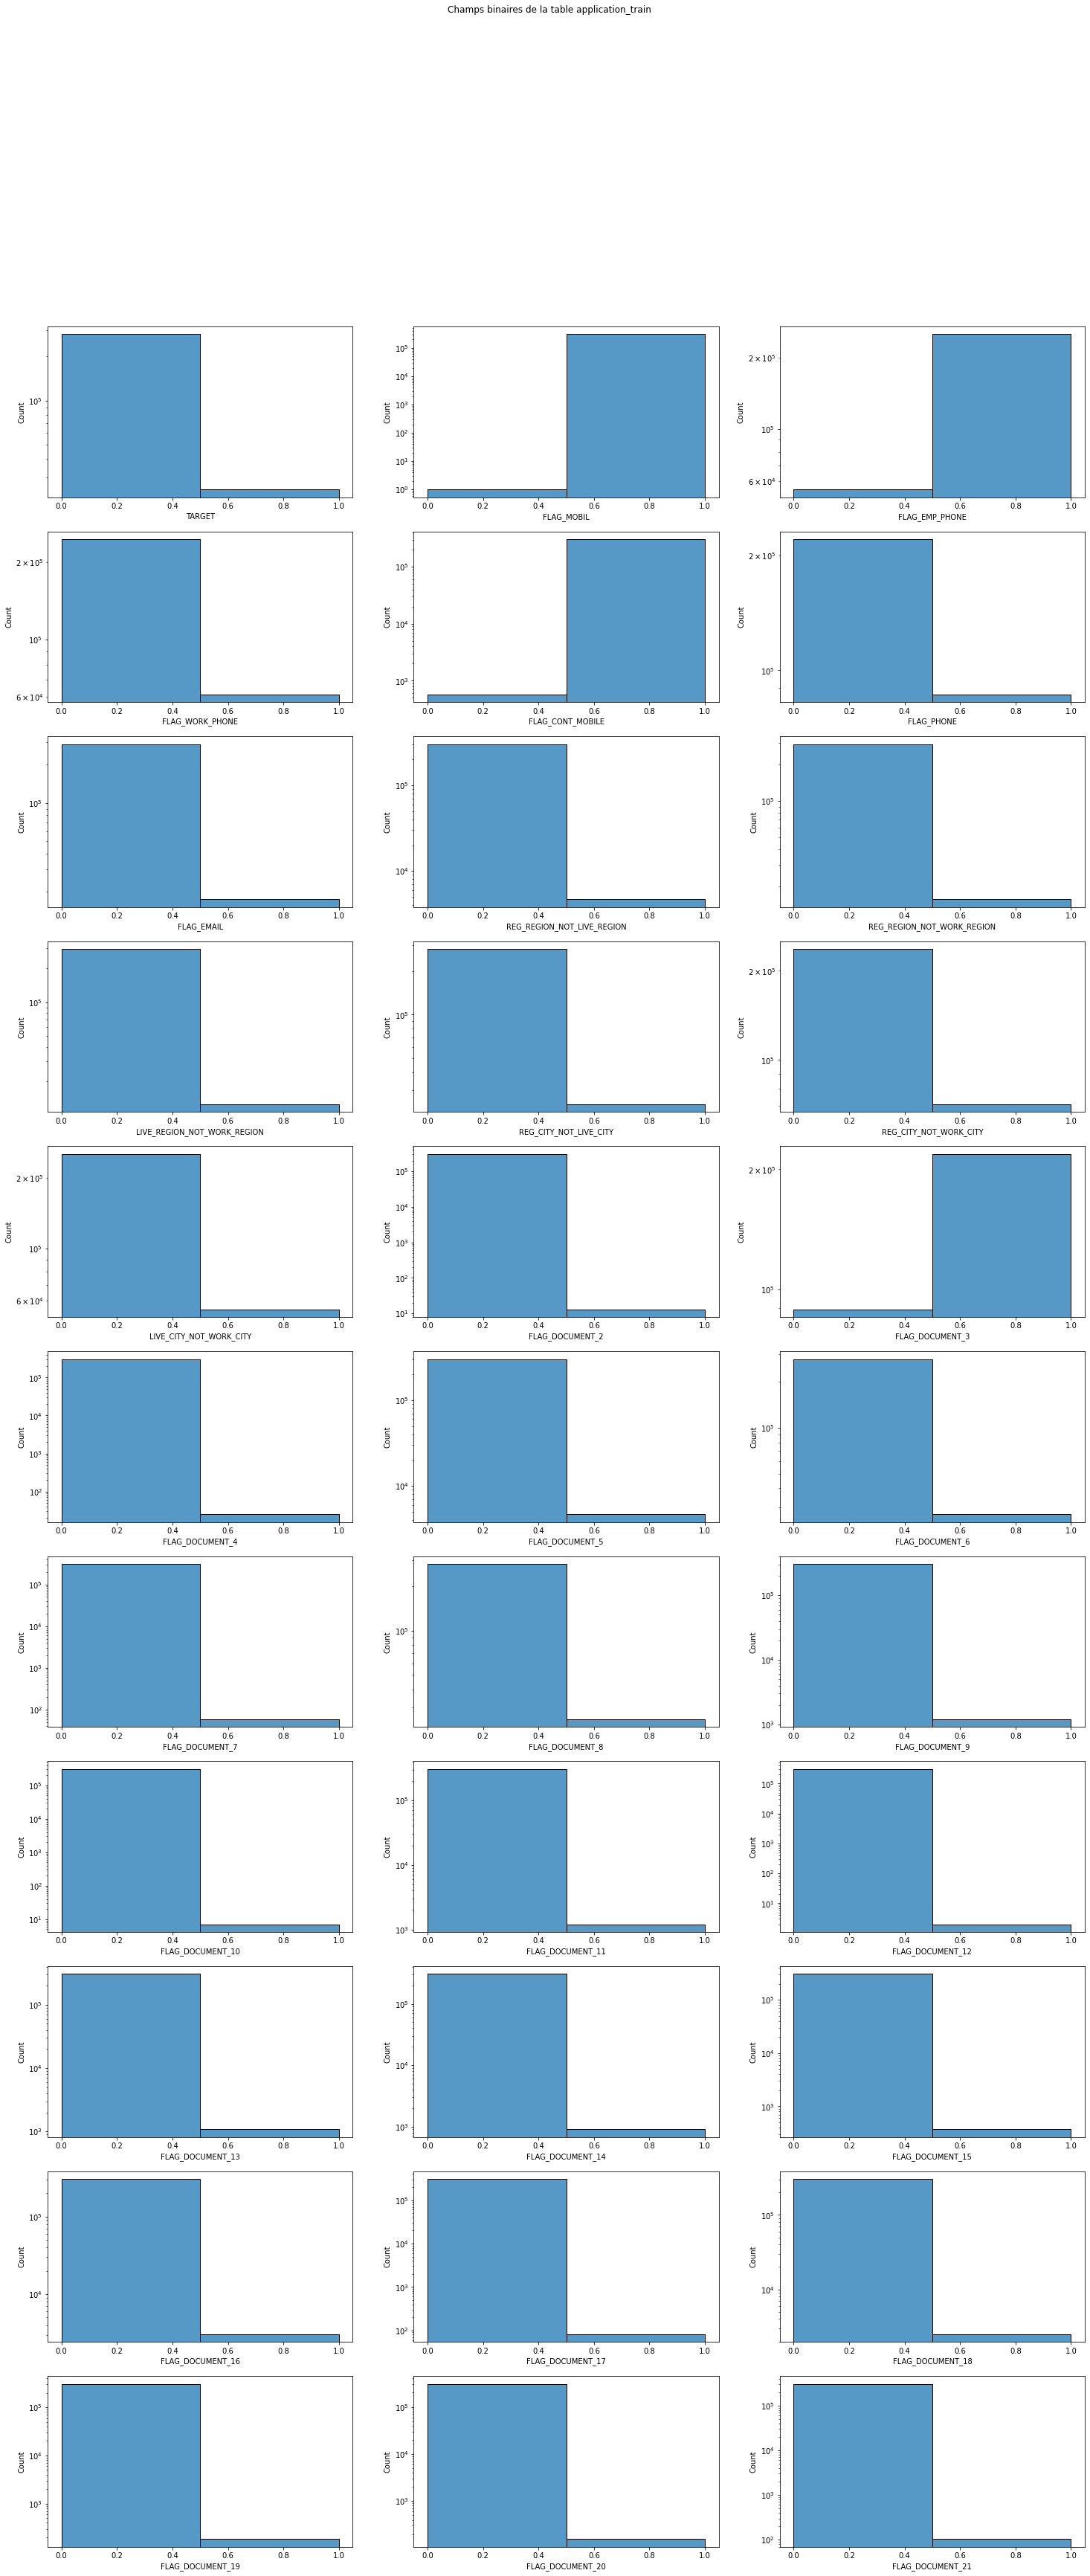

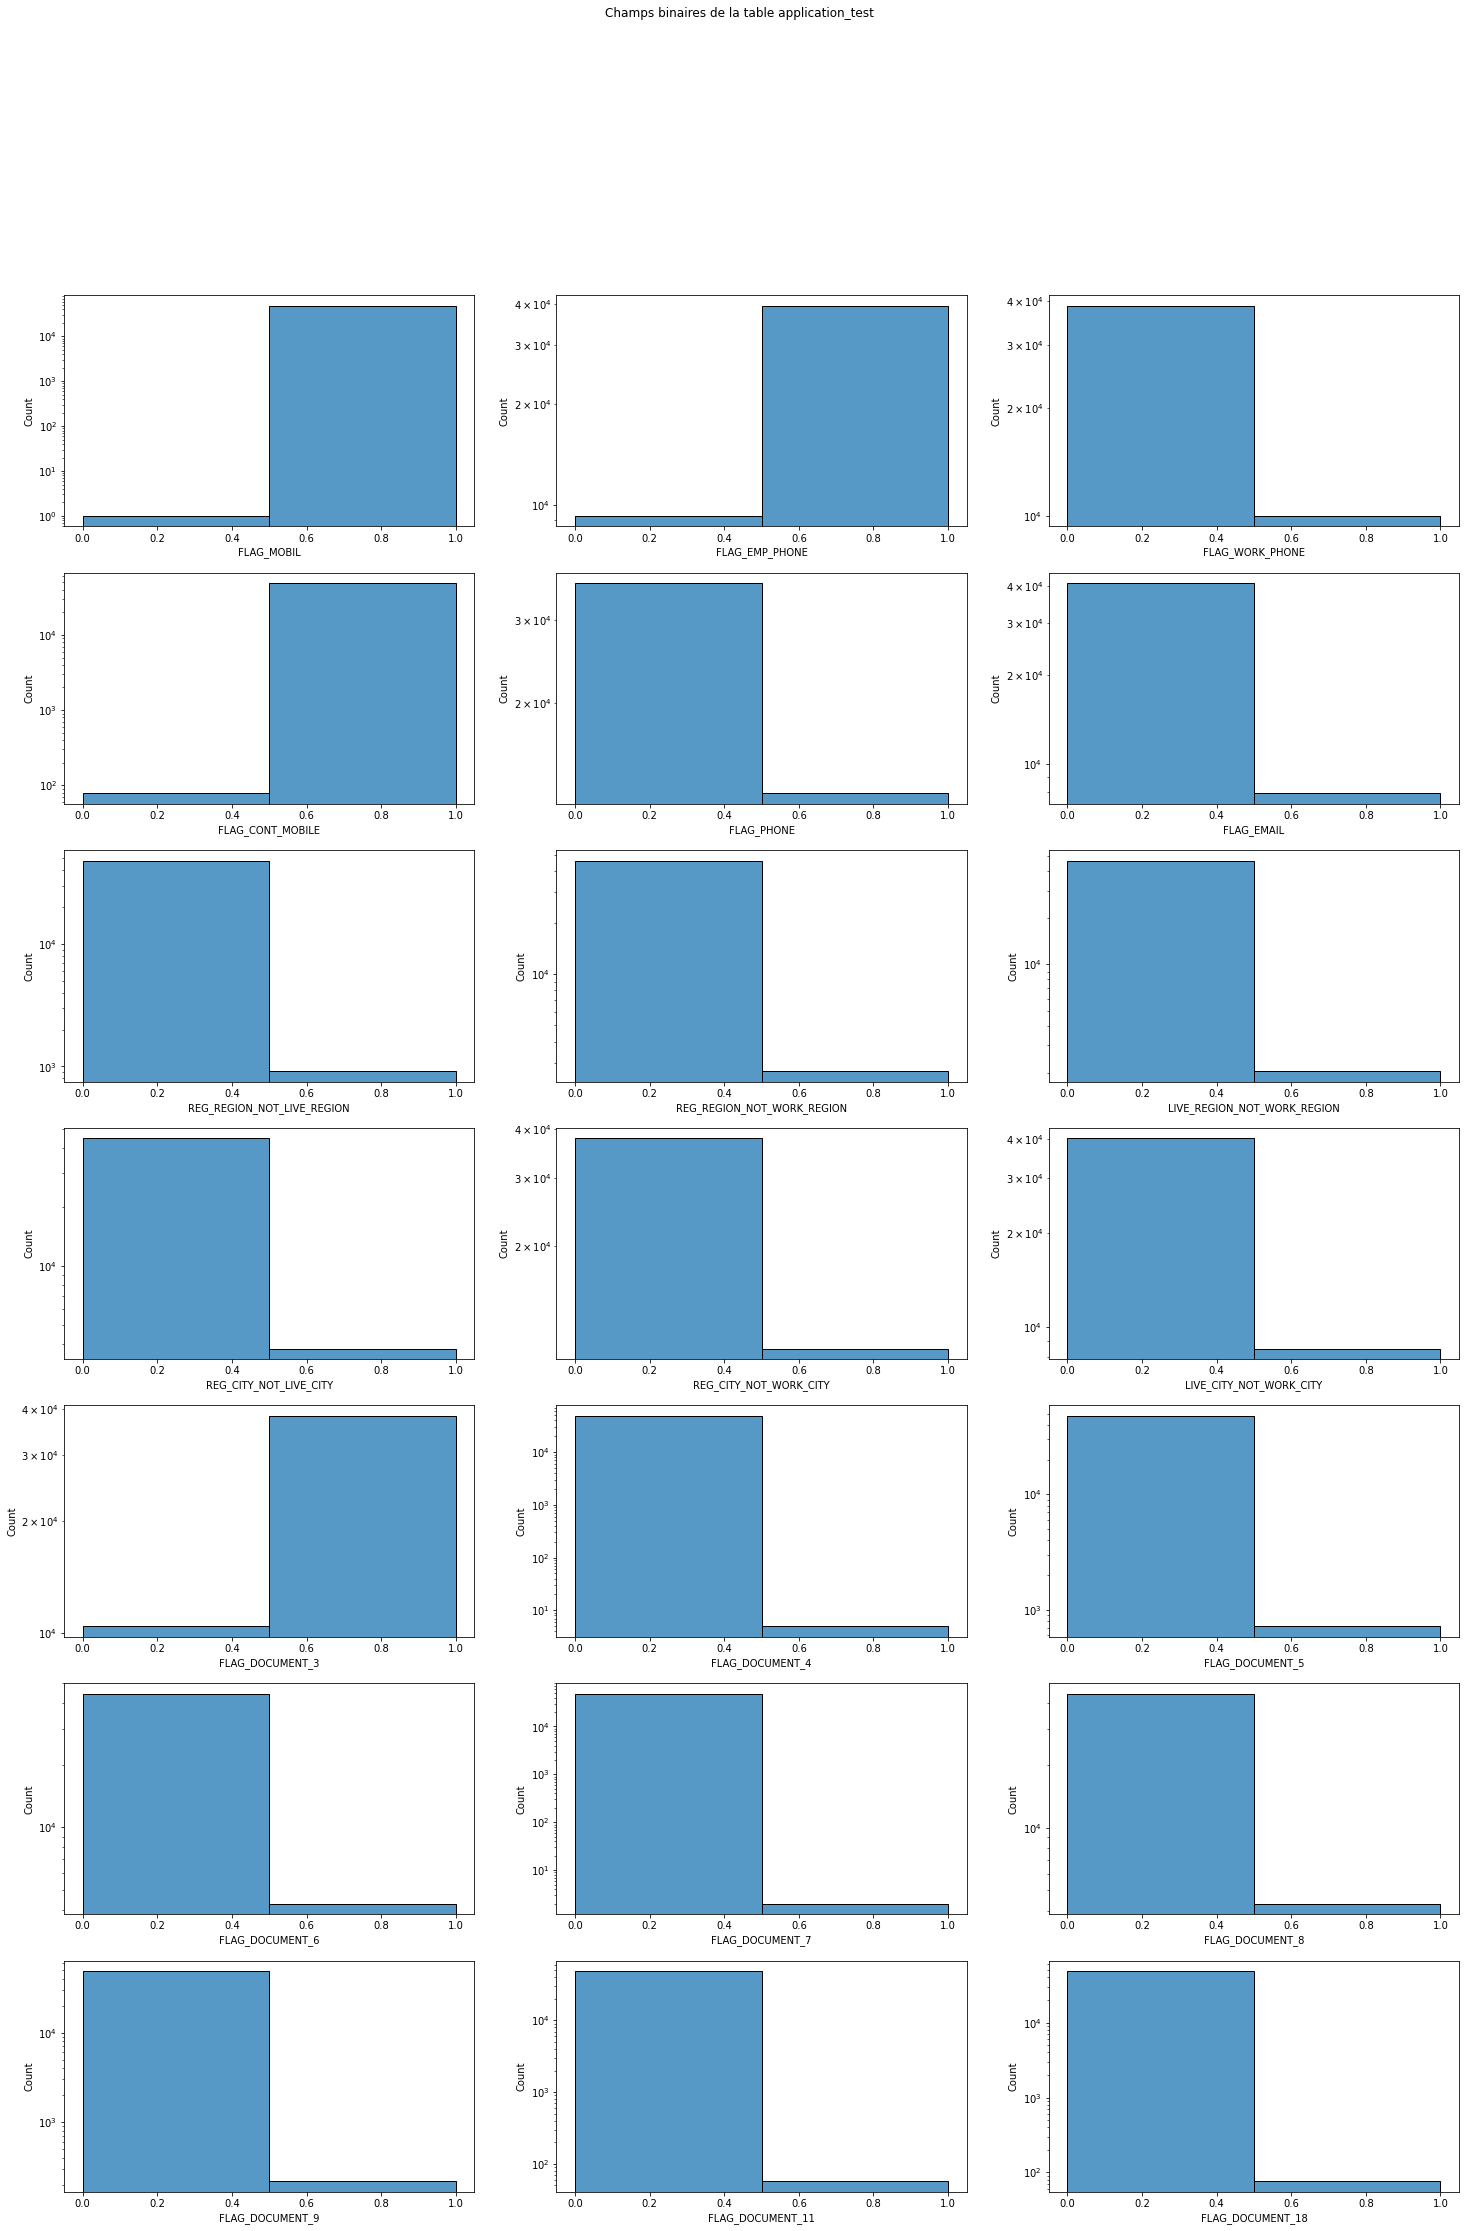

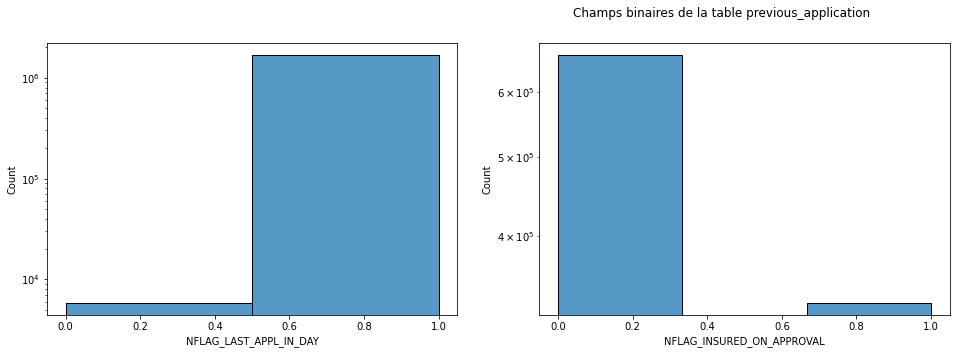

In [13]:
for la_table in [x for x in dictionnaire_df.keys() if x != 'HomeCredit_columns_description'] :
    les_champs = [col for col in dictionnaire_df[la_table].columns if dictionnaire_df[la_table][col].dtype != 'object']
    les_champs = [col for col in les_champs if col not in ['SK_ID_CURR',
                                                           'SK_ID_BUREAU',
                                                           'SK_ID_PREV']]
    # les champs binaires
    liste_binaires = [champ for champ in les_champs if dictionnaire_df[la_table][champ].nunique() == 2 ]
    if (len(liste_binaires) > 0) :
        trace_caractéristiques(la_table,
                               liste_binaires,
                               True)

**Prise en compte de l'exemple du kernel Kaggle : LightGBM with Simple Features**

L'auteur créée la plupart des caractéristiques nouvelles en appliquant les fonctions min, max, mean, sum et var functions aux tables groupées.
Un faible sélection des objets a été opérée et le sur_ajustement peut subvenir en raison des nombreux liens entre les objets. 

L'auteur se fonde sur les idées suivantes :
 * Diviser ou soustraire les caractéristiques importantes afin d'obtenir des taux (tels que annuité et revenu);
 * Créer des caractériques spécifiques pour les crédits actifs et cloturésn pour les données "Bureau";
 * Créer des caractéristiques spécifiques pour les demandes accordées ou refusées dans "Previous Applications";
 * Modularité : une fonction pour chaque table (à l'exception de bureau_balance et application_test);
 * Utiliser one_hot encoding pour les caractéristiques catégorielles;

 Toutes les tables sont jointes avec les data frame "application" en utilisant la clef SK_ID_CURR (à l'exception de bureau_balance).

 En revanche, le fichier application_test ne peut servir à l'apprentissage car il ne contient pas les cibles (TARGET). Il ne sera pas pris en compte contrairement à ce qui a été fait dans lightGBM.

Mise en place des traitements proposés dans lightGBM with simple features

**Imports complémentaires**

In [14]:
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',
                      category=FutureWarning)

**Définition d'un chronomètre**

In [15]:
# Chronomètre une action
# en entrée :
#  -titre : le nom de l'actioneffectuée
# en sortie :
#  -impression du temps pris
@contextmanager
def chronomètre(titre) :

    début = time.time()
    yield
    print('{} - effectué en {:.0f}s'.format(titre,
                                            time.time() - début))


**Définition d'un encodeur pour les catégories**

In [16]:
# Encode les données à catégoriser
# en entrée :
#  -df : le df à traiter
#  -nan_as_category  : mise à vrai du paramètre de l'encodeur
# en sortie :
#  -df : le df intial
#  -nouvelles_colonnes : les colonnes catégorisées
def encodeur_one_hot(df) :

    les_colonnes = list(df.columns) # on regarde les colonnes du df
    colonne_a_catégoriser = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, 
                        columns = colonne_a_catégoriser,
                        dummy_na = True)
    nouvelles_colonnes = [c for c in df.columns if c not in les_colonnes]
    
    return df, nouvelles_colonnes


Quels champs peut-on catégoriser?

In [17]:
# affiche les caractéristiques catégorielles d'une table
# en entrée :
# -nom_table : la table étudiée
# en sortie :
# -la liste des champs et leur visualisation graphique
def caractéristiques_table(nom_table) :

    dictionnaire_df[nom_table].columns[dictionnaire_df[nom_table].dtypes == object] # liste des champs de type objet
    # affichage des catégories potentielles
    liste_champs_catégoriel = dictionnaire_df[nom_table].columns[dictionnaire_df[nom_table].dtypes == object]
    liste_champs_catégoriel = [col for col in liste_champs_catégoriel if col not in ['SK_ID_CURR',
                                                                                     'SK_ID_BUREAU',
                                                                                     'SK_ID_PREV']]
    if len(liste_champs_catégoriel) > 0 :
        for champ in liste_champs_catégoriel :
            print(champ,
                  ' :\n',
                  pd.Categorical(dictionnaire_df[nom_table][champ]).categories, '\n')
        # visualisation graphique des champs
        if len(liste_champs_catégoriel) > 1 :
            nombre_de_graphes = len(liste_champs_catégoriel)
            if nombre_de_graphes // 2 == 0 :
                lignes = nombre_de_graphes // 2
            else :
                lignes = 1 + nombre_de_graphes // 2
            figure = plt.figure(figsize = (25,
                                           50))
            plt.gcf().subplots_adjust(left = 0.2,
                                      bottom = 0,
                                      right = 0.9,
                                      top = 0.9,
                                      wspace = 0.25,
                                      hspace = 1)
            i = 1
            for champ in liste_champs_catégoriel :
                figure.add_subplot(lignes,
                                2,
                                i)
                sns.histplot(data = dictionnaire_df[nom_table][champ][~dictionnaire_df[nom_table][champ].isnull()],
                             bins = len(dictionnaire_df[nom_table][champ].unique().tolist()),
                             kde = False).set_yscale('log')
                plt.xticks(rotation = 90)
                i += 1
            plt.show()
        else :
            figure = plt.figure(figsize = (5,
                                           5))
            champ = liste_champs_catégoriel[0]
            sns.histplot(data = dictionnaire_df[nom_table][champ][~dictionnaire_df[nom_table][champ].isnull()],
                         bins = len(dictionnaire_df[nom_table][champ].unique().tolist()),
                         kde = False).set_yscale('log')
            plt.xticks(rotation = 90)
            plt.show()
    else :
        print('Pas de champs concernés')


In [18]:
dictionnaire_df.keys()

dict_keys(['sample_submission', 'bureau_balance', 'POS_CASH_balance', 'application_train', 'HomeCredit_columns_description', 'application_test', 'previous_application', 'credit_card_balance', 'installments_payments', 'bureau'])

sample_submission :

Pas de champs concernés
--------------------------------------------------------------------

bureau_balance :

STATUS  :
 Index(['0', '1', '2', '3', '4', '5', 'C', 'X'], dtype='object') 



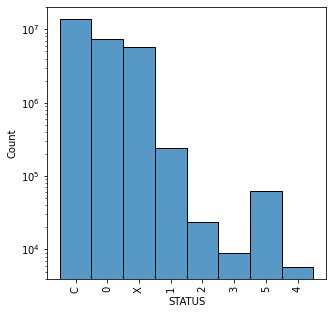

--------------------------------------------------------------------

POS_CASH_balance :

NAME_CONTRACT_STATUS  :
 Index(['Active', 'Amortized debt', 'Approved', 'Canceled', 'Completed',
       'Demand', 'Returned to the store', 'Signed', 'XNA'],
      dtype='object') 



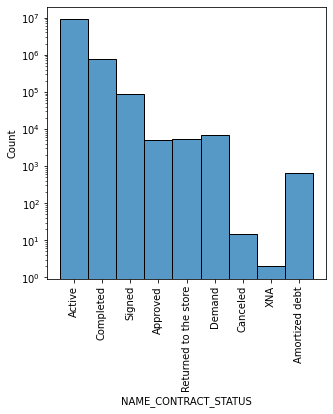

--------------------------------------------------------------------

application_train :

NAME_CONTRACT_TYPE  :
 Index(['Cash loans', 'Revolving loans'], dtype='object') 

CODE_GENDER  :
 Index(['F', 'M', 'XNA'], dtype='object') 

FLAG_OWN_CAR  :
 Index(['N', 'Y'], dtype='object') 

FLAG_OWN_REALTY  :
 Index(['N', 'Y'], dtype='object') 

NAME_TYPE_SUITE  :
 Index(['Children', 'Family', 'Group of people', 'Other_A', 'Other_B',
       'Spouse, partner', 'Unaccompanied'],
      dtype='object') 

NAME_INCOME_TYPE  :
 Index(['Businessman', 'Commercial associate', 'Maternity leave', 'Pensioner',
       'State servant', 'Student', 'Unemployed', 'Working'],
      dtype='object') 

NAME_EDUCATION_TYPE  :
 Index(['Academic degree', 'Higher education', 'Incomplete higher',
       'Lower secondary', 'Secondary / secondary special'],
      dtype='object') 

NAME_FAMILY_STATUS  :
 Index(['Civil marriage', 'Married', 'Separated', 'Single / not married',
       'Unknown', 'Widow'],
      dtype='objec

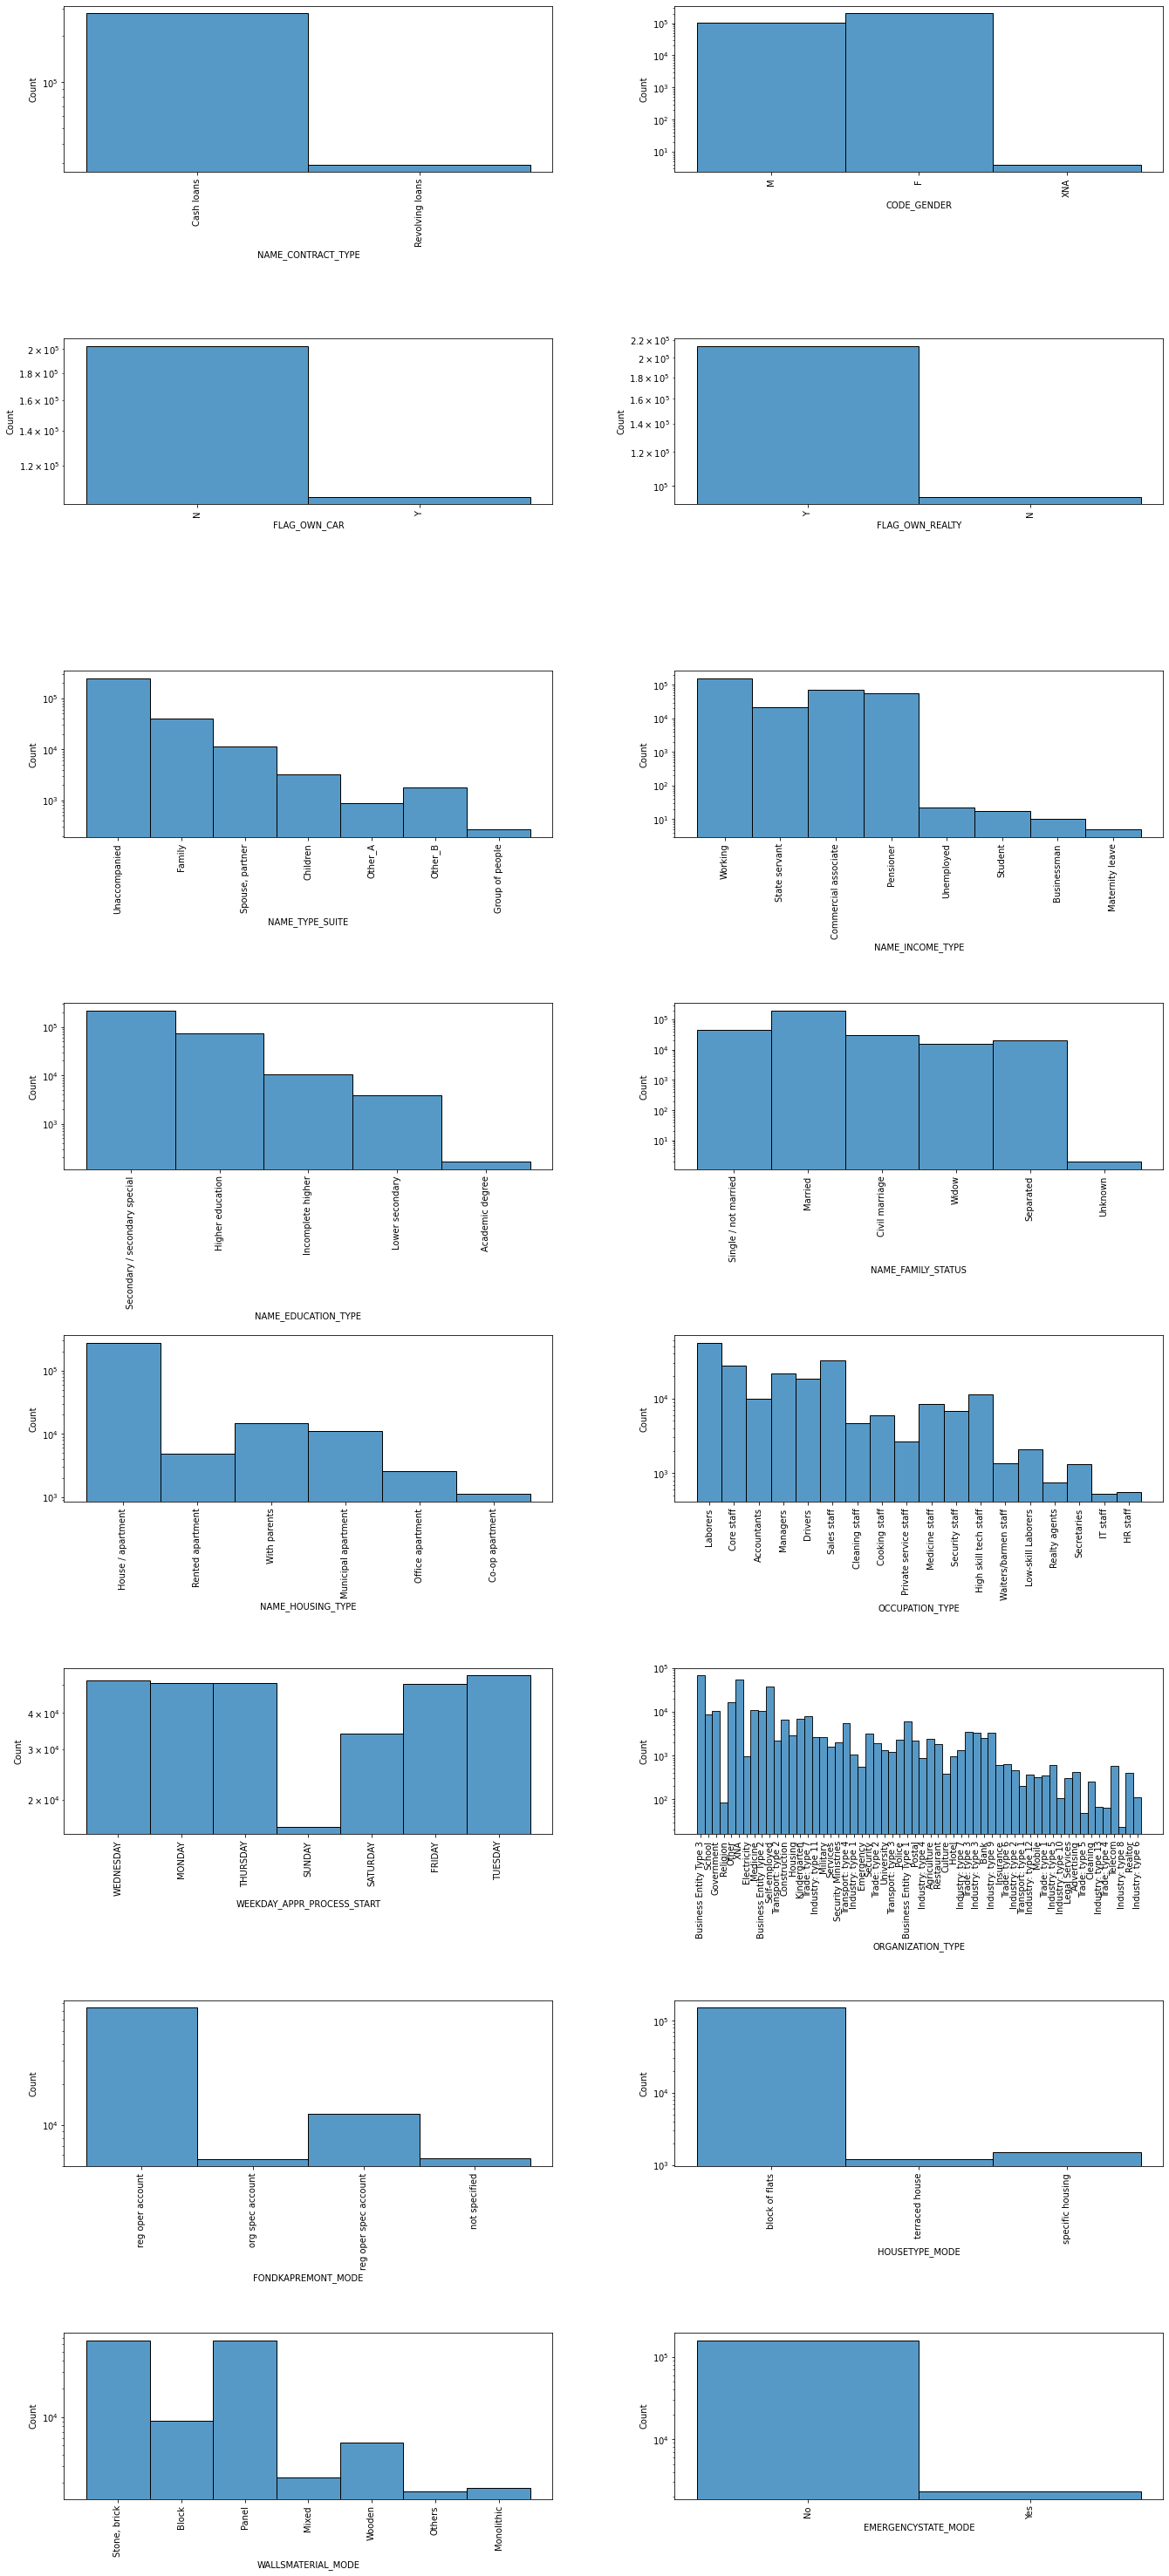

--------------------------------------------------------------------

application_test :

NAME_CONTRACT_TYPE  :
 Index(['Cash loans', 'Revolving loans'], dtype='object') 

CODE_GENDER  :
 Index(['F', 'M'], dtype='object') 

FLAG_OWN_CAR  :
 Index(['N', 'Y'], dtype='object') 

FLAG_OWN_REALTY  :
 Index(['N', 'Y'], dtype='object') 

NAME_TYPE_SUITE  :
 Index(['Children', 'Family', 'Group of people', 'Other_A', 'Other_B',
       'Spouse, partner', 'Unaccompanied'],
      dtype='object') 

NAME_INCOME_TYPE  :
 Index(['Businessman', 'Commercial associate', 'Pensioner', 'State servant',
       'Student', 'Unemployed', 'Working'],
      dtype='object') 

NAME_EDUCATION_TYPE  :
 Index(['Academic degree', 'Higher education', 'Incomplete higher',
       'Lower secondary', 'Secondary / secondary special'],
      dtype='object') 

NAME_FAMILY_STATUS  :
 Index(['Civil marriage', 'Married', 'Separated', 'Single / not married',
       'Widow'],
      dtype='object') 

NAME_HOUSING_TYPE  :
 Index(['Co

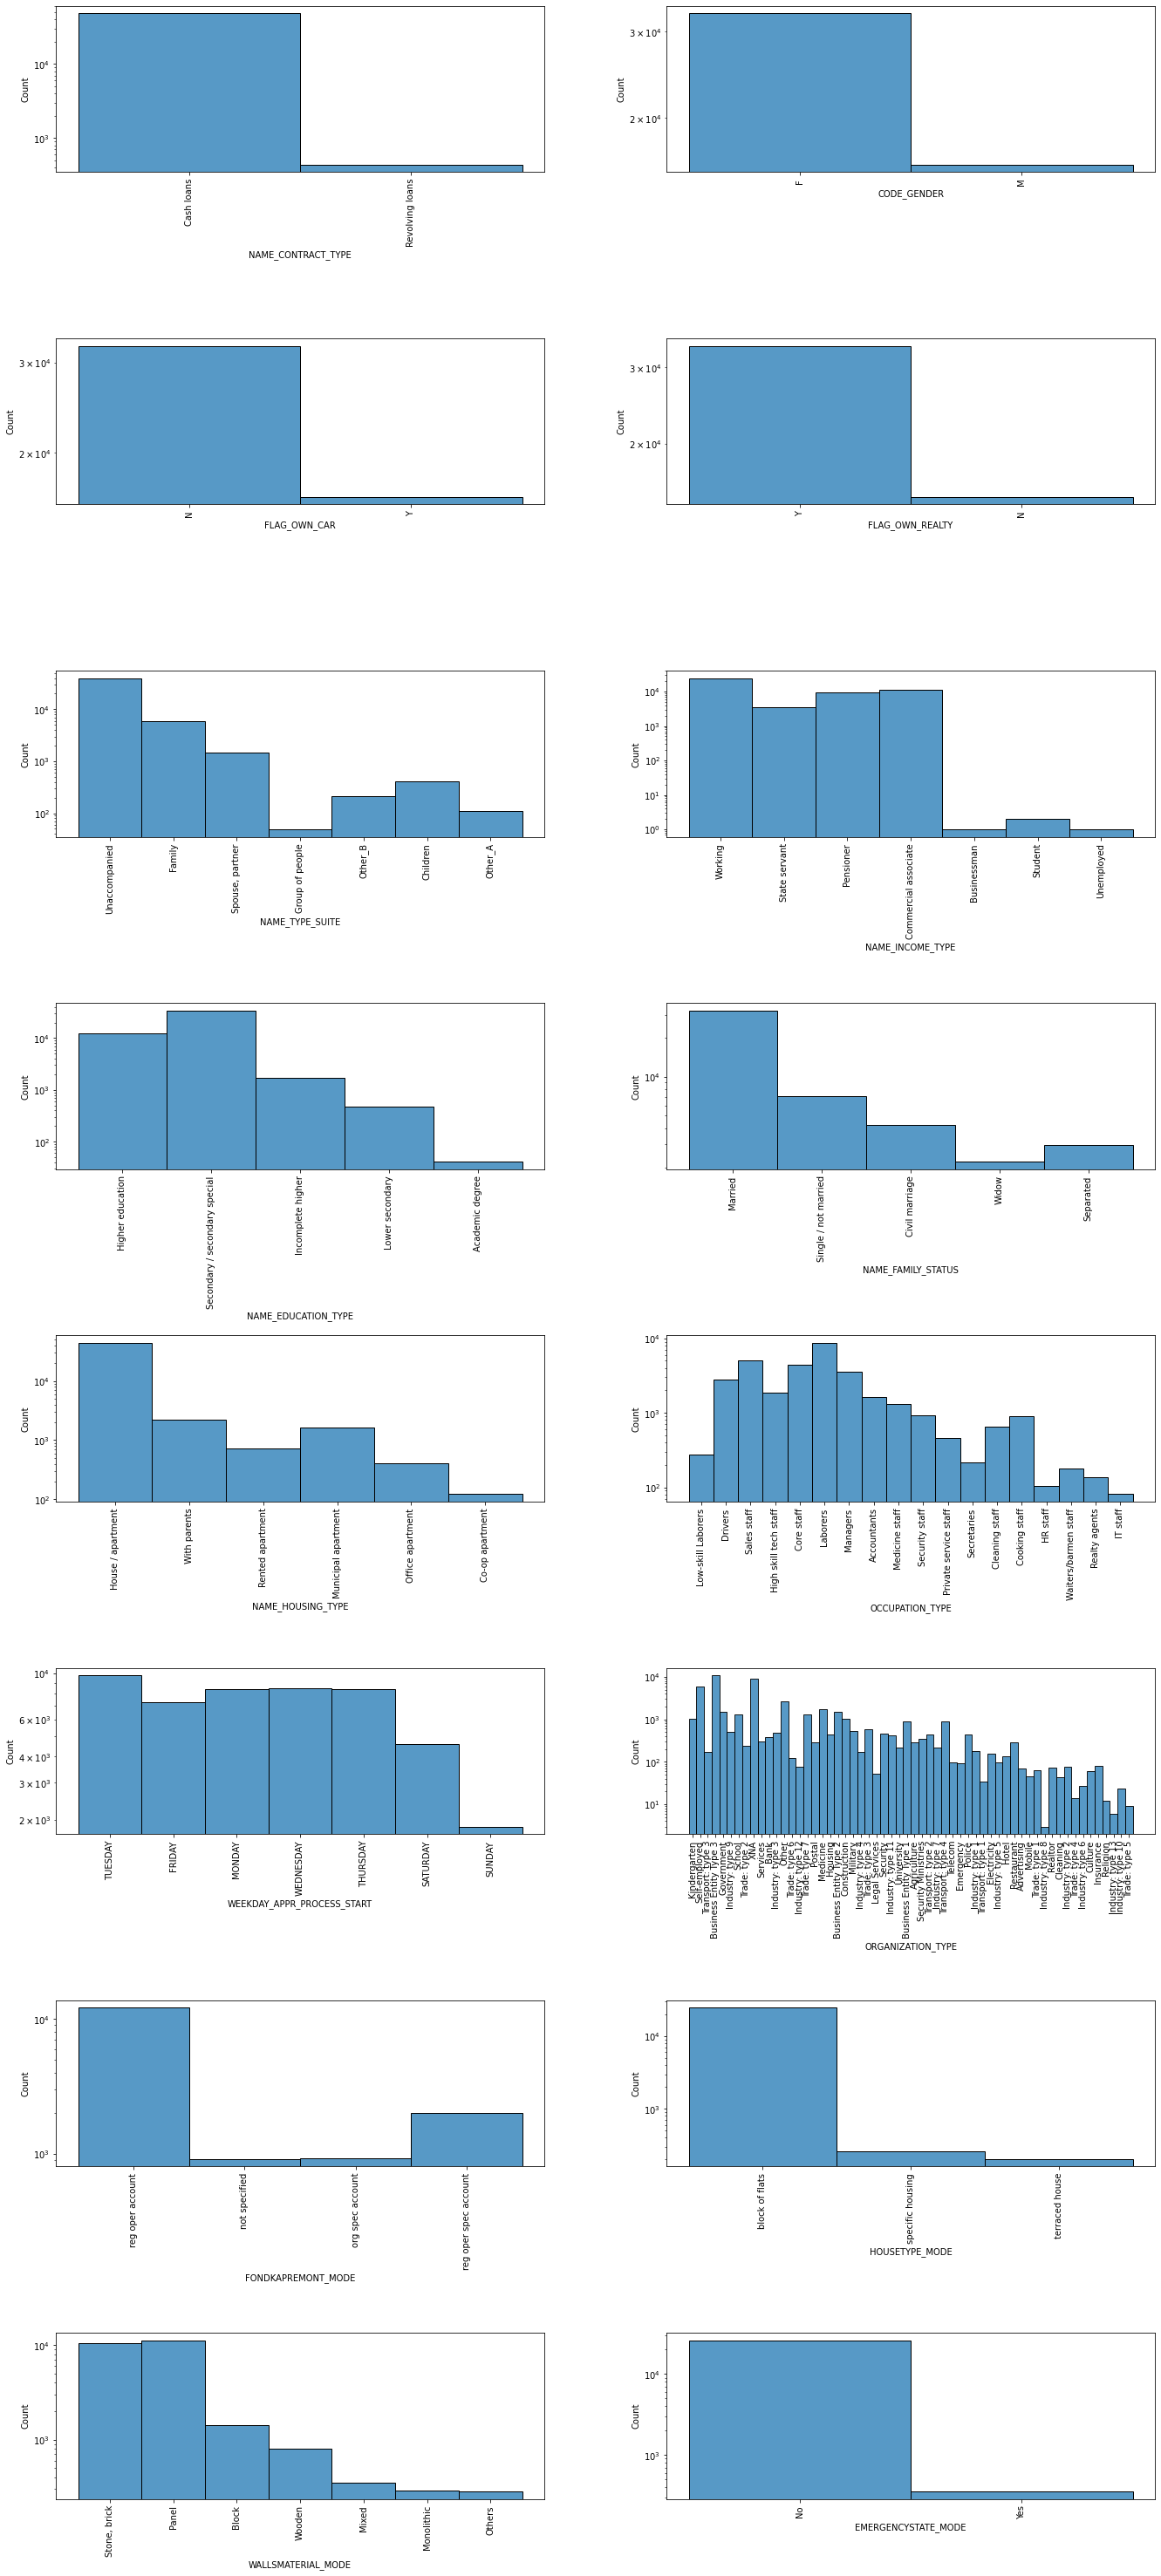

--------------------------------------------------------------------

previous_application :

NAME_CONTRACT_TYPE  :
 Index(['Cash loans', 'Consumer loans', 'Revolving loans', 'XNA'], dtype='object') 

WEEKDAY_APPR_PROCESS_START  :
 Index(['FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 'THURSDAY', 'TUESDAY',
       'WEDNESDAY'],
      dtype='object') 

FLAG_LAST_APPL_PER_CONTRACT  :
 Index(['N', 'Y'], dtype='object') 

NAME_CASH_LOAN_PURPOSE  :
 Index(['Building a house or an annex', 'Business development',
       'Buying a garage', 'Buying a holiday home / land', 'Buying a home',
       'Buying a new car', 'Buying a used car', 'Car repairs', 'Education',
       'Everyday expenses', 'Furniture', 'Gasification / water supply',
       'Hobby', 'Journey', 'Medicine', 'Money for a third person', 'Other',
       'Payments on other loans', 'Purchase of electronic equipment',
       'Refusal to name the goal', 'Repairs', 'Urgent needs',
       'Wedding / gift / holiday', 'XAP', 'XNA'],
      dtype=

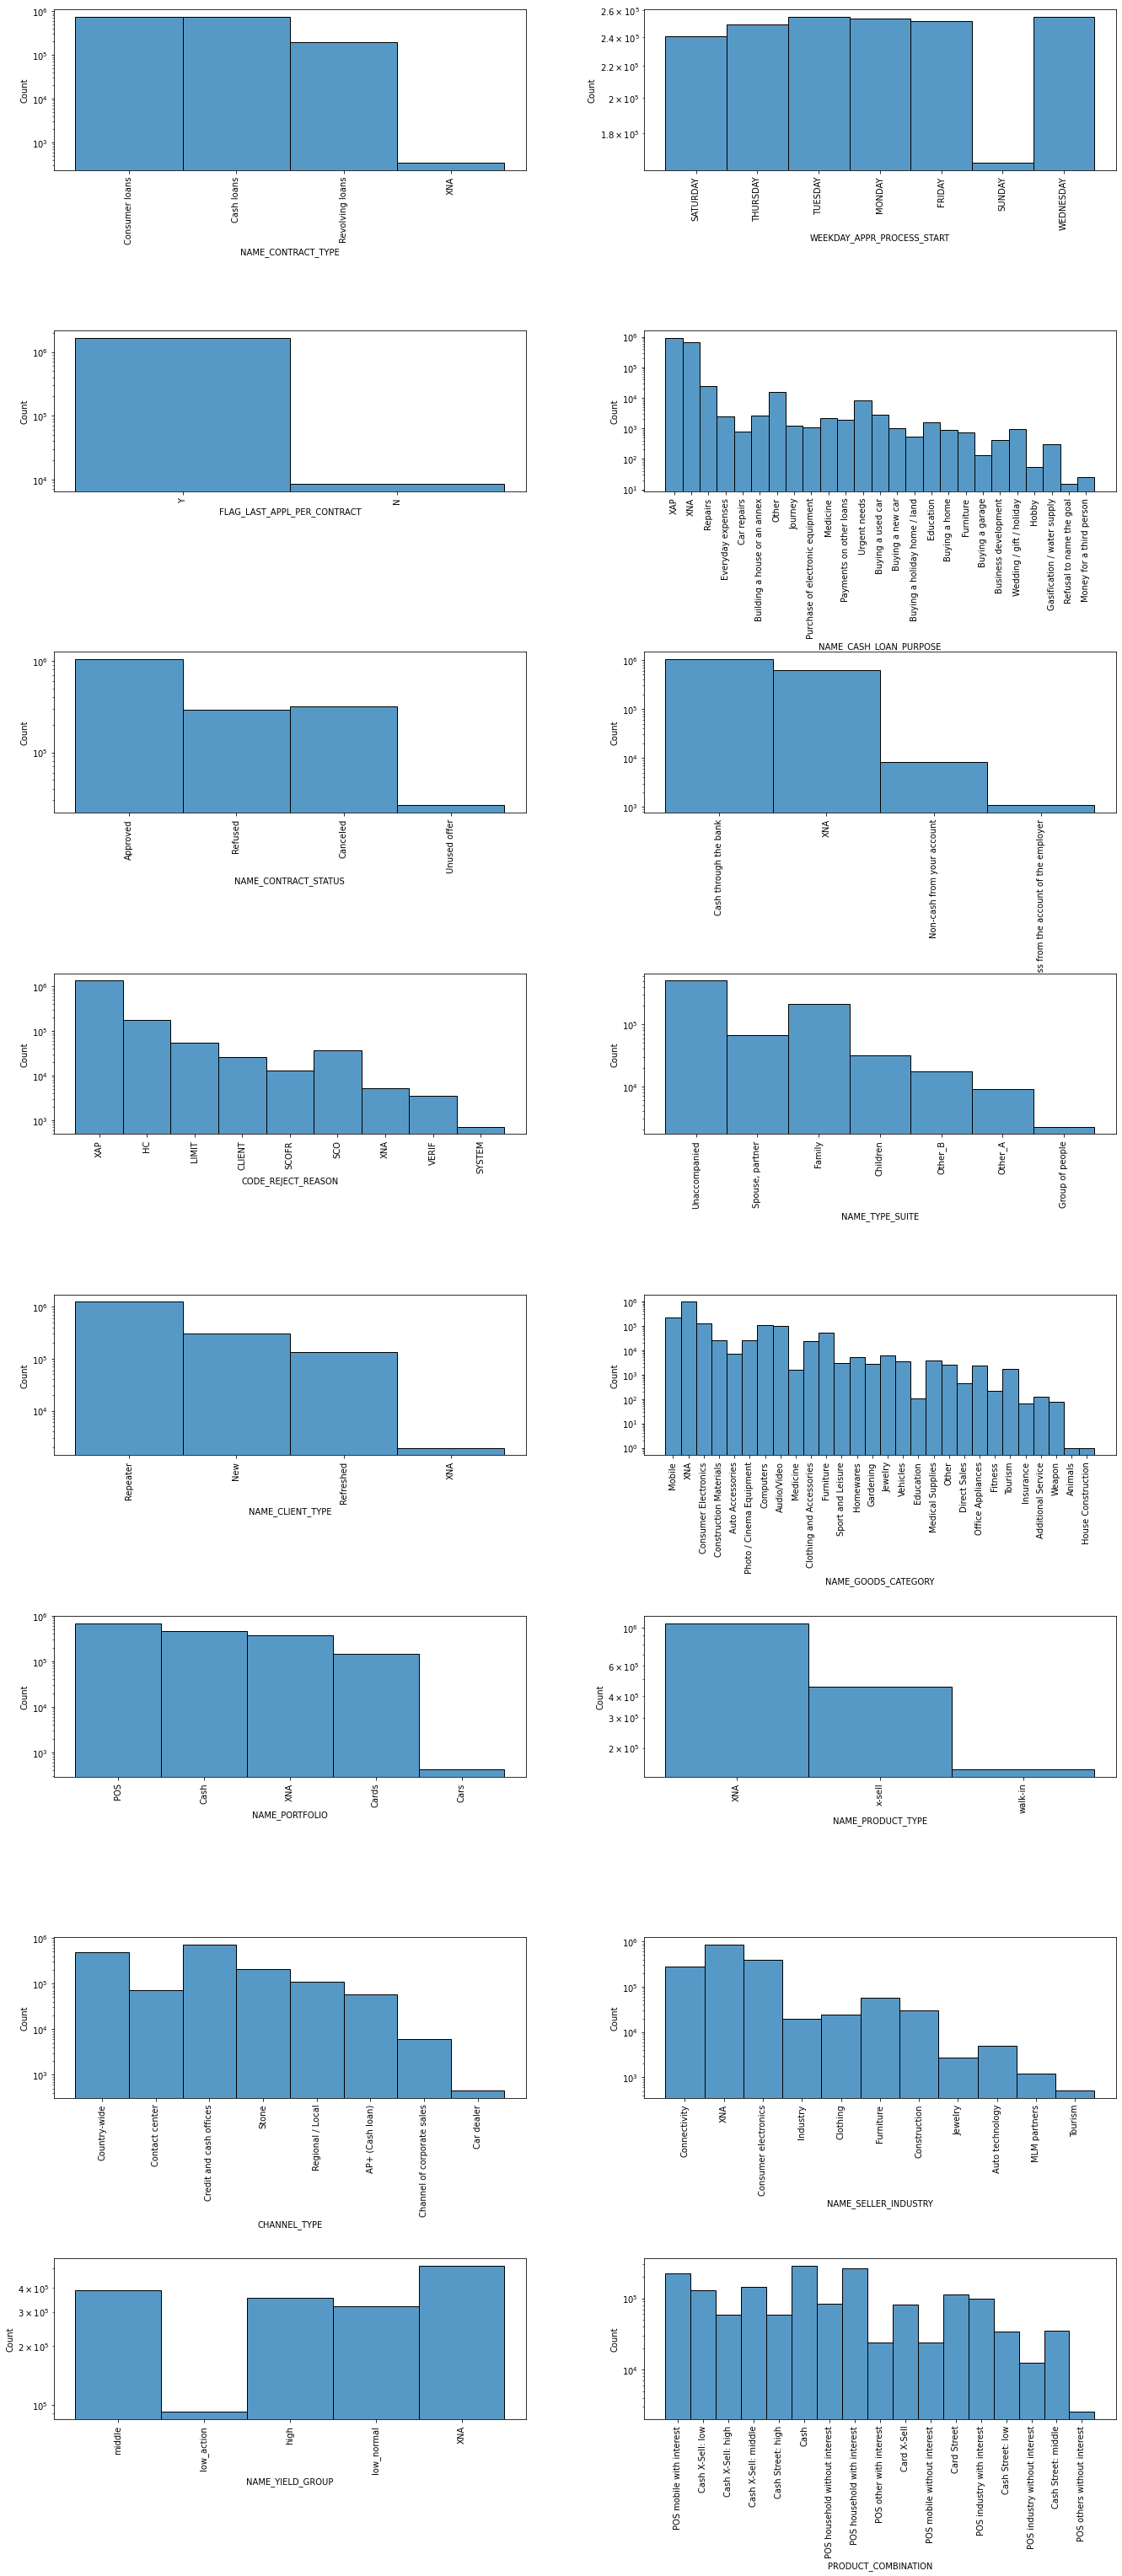

--------------------------------------------------------------------

credit_card_balance :

NAME_CONTRACT_STATUS  :
 Index(['Active', 'Approved', 'Completed', 'Demand', 'Refused', 'Sent proposal',
       'Signed'],
      dtype='object') 



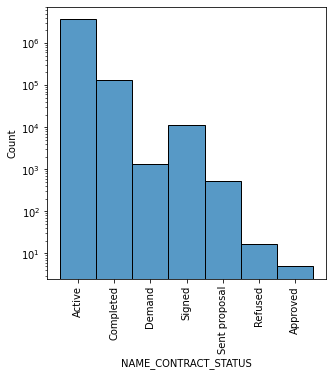

--------------------------------------------------------------------

installments_payments :

Pas de champs concernés
--------------------------------------------------------------------

bureau :

CREDIT_ACTIVE  :
 Index(['Active', 'Bad debt', 'Closed', 'Sold'], dtype='object') 

CREDIT_CURRENCY  :
 Index(['currency 1', 'currency 2', 'currency 3', 'currency 4'], dtype='object') 

CREDIT_TYPE  :
 Index(['Another type of loan', 'Car loan', 'Cash loan (non-earmarked)',
       'Consumer credit', 'Credit card', 'Interbank credit',
       'Loan for business development',
       'Loan for purchase of shares (margin lending)',
       'Loan for the purchase of equipment',
       'Loan for working capital replenishment', 'Microloan',
       'Mobile operator loan', 'Mortgage', 'Real estate loan',
       'Unknown type of loan'],
      dtype='object') 



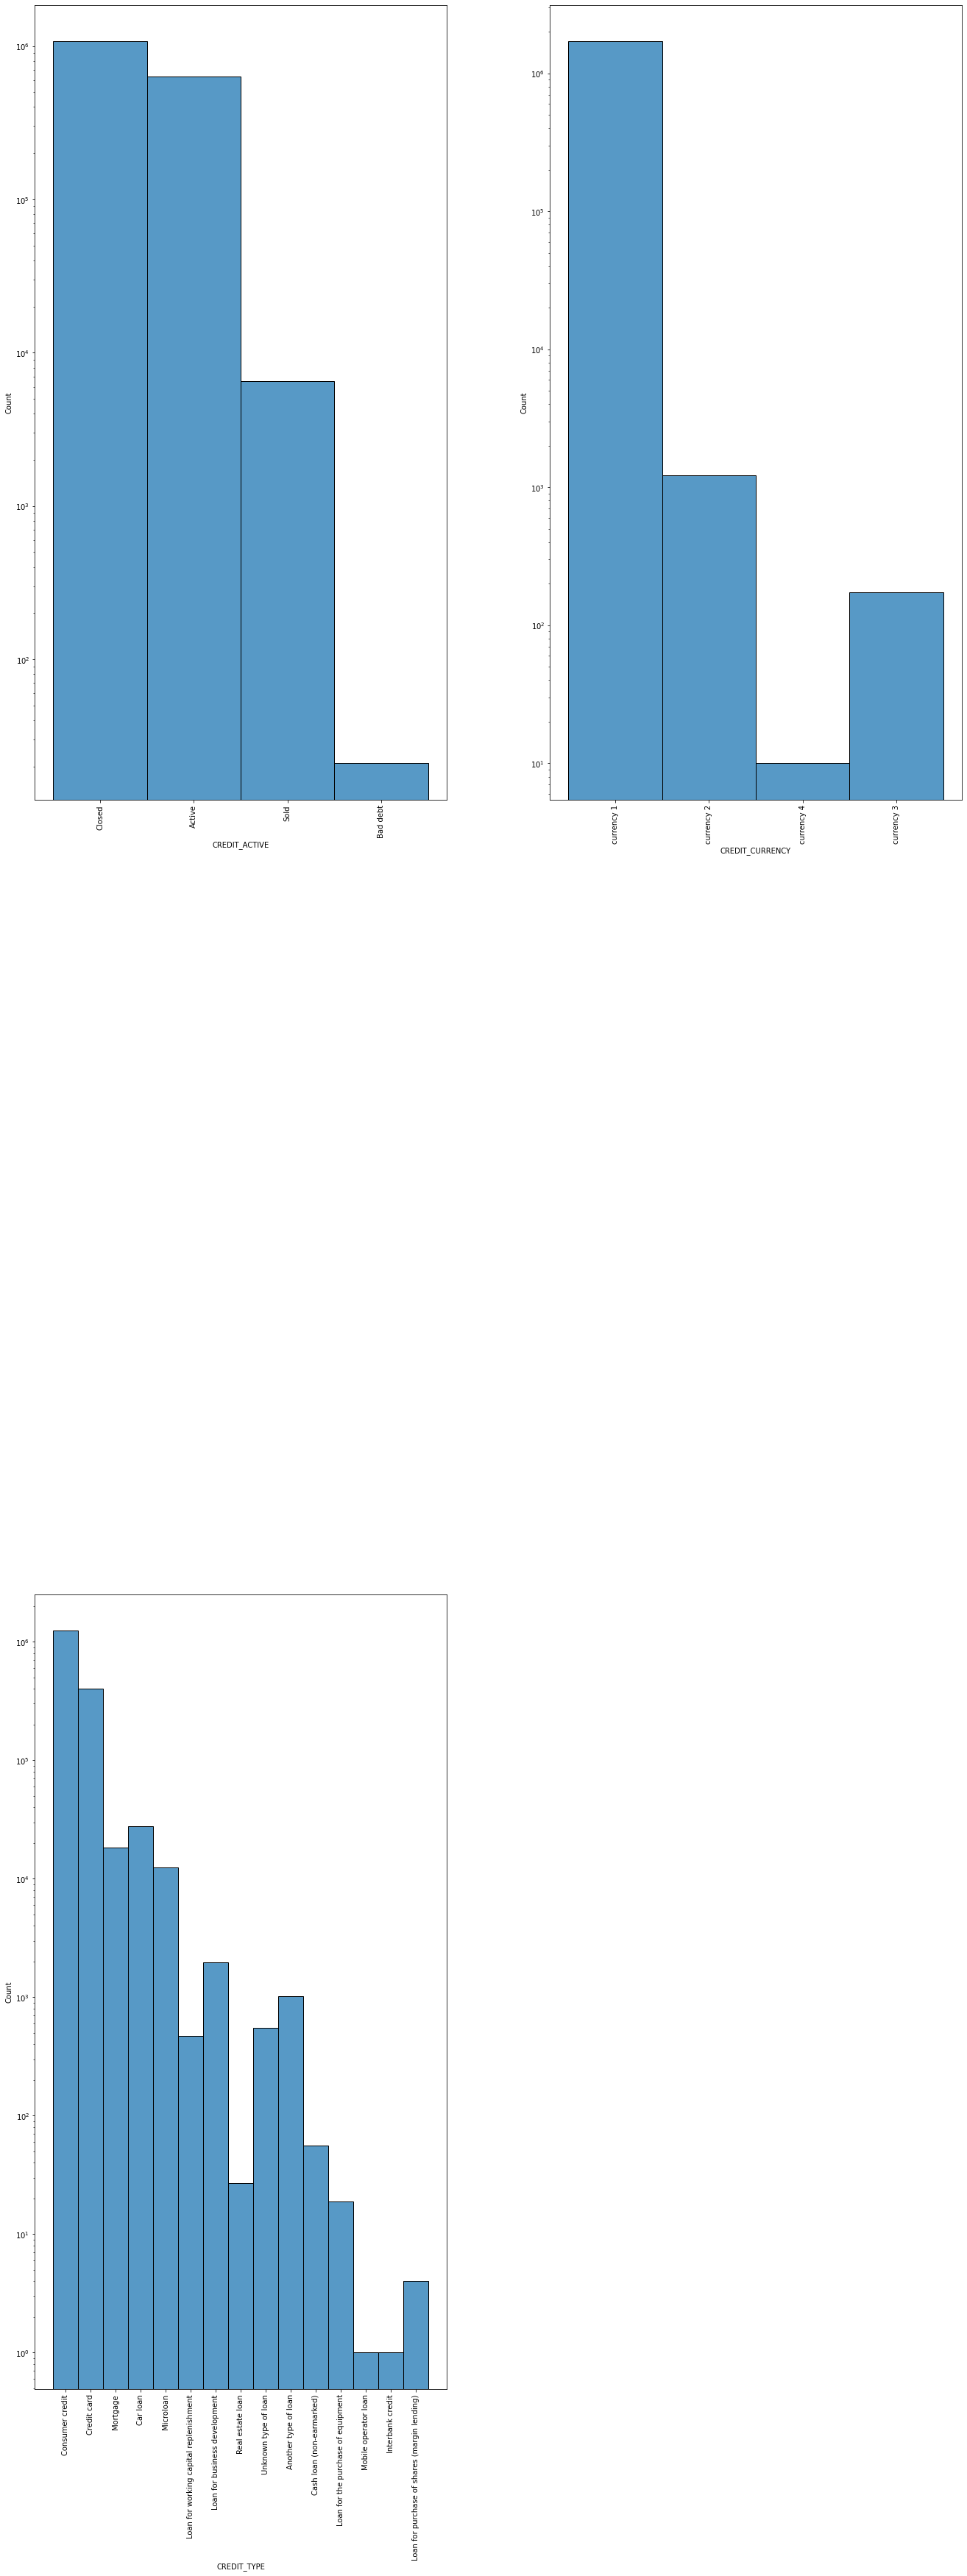

--------------------------------------------------------------------



In [19]:
for la_table in [x for x in dictionnaire_df.keys() if x != 'HomeCredit_columns_description'] :
    print(la_table + ' :\n')
    caractéristiques_table(la_table)
    print('--------------------------------------------------------------------\n')

In [20]:
# traite le jeu d'entrainement
# en entrée :
#  -nan_as_category : valeur pour l'encodeur 
# en sortie :
#  -le_df : un df entrainement encodé et nettoyé
def traite_application() :
    
    # lecture et jointure des données
    le_df = dictionnaire_df['application_train']
    print('Jeu d\'origine :',
          le_df.shape)

    # application de l'option : suppression des demandes contenant le code de genre de type XNA
    le_df = le_df[le_df['CODE_GENDER'] != 'XNA']
    
    # caractéristiques à encodage binaire
    for les_binaires in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'] :
        le_df[les_binaires], uniques = pd.factorize(le_df[les_binaires])

    # carcatéristiques à encoder avec one_hot
    le_df, cat_cols = encodeur_one_hot(le_df)
    
    # valeurs Nan pour DAYS_EMPLOYED: 365.243 -> nan
    le_df['DAYS_EMPLOYED'].replace(365243,
                                   np.nan,
                                   inplace = True)

    # création de carcatéristiques sous la forme de pourcentage (nombres décimaux)
    le_df['DAYS_EMPLOYED_PERC'] = le_df['DAYS_EMPLOYED'] / le_df['DAYS_BIRTH']
    le_df['INCOME_PER_PERSON'] = le_df['AMT_INCOME_TOTAL'] / le_df['CNT_FAM_MEMBERS']
    le_df['ANNUITY_INCOME_PERC'] = le_df['AMT_ANNUITY'] / le_df['AMT_INCOME_TOTAL']
    le_df['PAYMENT_RATE'] = le_df['AMT_ANNUITY'] / le_df['AMT_CREDIT']

    gc.collect()

    print('Après traitement :',
          le_df.shape)
    
    return le_df

**Pré-traitement de bureau et de bureau balance**

In [21]:
# Traite les données liées au bureau des crédits et de leurs balances
# en entrée :
# -nan_as_category : paramètre pour le hot encodeur
# en sortie :
# -le_bureau_aggrégé : table bureau et balances avec les calculs d'aggrégats et les table liées
def bureau_et_balance(nan_as_category = True):

    le_bureau = dictionnaire_df['bureau']
    les_balances = dictionnaire_df['bureau_balance']
    les_balances, les_balances_catégorisées = encodeur_one_hot(les_balances)
    le_bureau, le_bureau_catégorisé = encodeur_one_hot(le_bureau)
    
    # aggrégation et fusion des balances avec le bureau
    balances_aggrégées = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in les_balances_catégorisées :
        balances_aggrégées[col] = ['mean']
    balances_aggrégées = les_balances.groupby('SK_ID_BUREAU').agg(balances_aggrégées)
    balances_aggrégées.columns = pd.Index([e[0] + "_" + e[1].upper() for e in balances_aggrégées.columns.tolist()])
    le_bureau = le_bureau.join(balances_aggrégées,
                               how='left',
                               on='SK_ID_BUREAU')
    le_bureau.drop(['SK_ID_BUREAU'],
                   axis=1,
                   inplace= True)

    del les_balances, balances_aggrégées

    gc.collect()
    
    # caractéristiques numériques
    aggrégations_numériques = {'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
                               'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
                               'DAYS_CREDIT_UPDATE': ['mean'],
                               'CREDIT_DAY_OVERDUE': ['max', 'mean'],
                               'AMT_CREDIT_MAX_OVERDUE': ['mean'],
                               'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
                               'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
                               'AMT_CREDIT_SUM_OVERDUE': ['mean'],
                               'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
                               'AMT_ANNUITY': ['max', 'mean'],
                               'CNT_CREDIT_PROLONG': ['sum'],
                               'MONTHS_BALANCE_MIN': ['min'],
                               'MONTHS_BALANCE_MAX': ['max'],
                               'MONTHS_BALANCE_SIZE': ['mean', 'sum']}

    # caractéristiques catégorielles
    aggrégations_catégorielles = {}
    for cat in le_bureau_catégorisé:
        aggrégations_catégorielles[cat] = ['mean']

    for cat in les_balances_catégorisées :
        aggrégations_catégorielles[cat + "_MEAN"] = ['mean']
    
    le_bureau_aggrégé = le_bureau.groupby('SK_ID_CURR').agg({**aggrégations_numériques,
                                                             **aggrégations_catégorielles})
    le_bureau_aggrégé.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in le_bureau_aggrégé.columns.tolist()])

    # on ne prend que les aggrégations numériques pour active credits
    crédits_actifs = le_bureau[le_bureau['CREDIT_ACTIVE_Active'] == 1]
    aggrégations_crédits_actifs = crédits_actifs.groupby('SK_ID_CURR').agg(aggrégations_numériques)
    aggrégations_crédits_actifs.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in aggrégations_crédits_actifs.columns.tolist()])
    le_bureau_aggrégé = le_bureau_aggrégé.join(aggrégations_crédits_actifs,
                                               how = 'left',
                                               on = 'SK_ID_CURR')
   
    del crédits_actifs, aggrégations_crédits_actifs

    gc.collect()

    # on ne prend ques les aggréations numériques pour les crédits clôturés
    crédits_clôturés = le_bureau[le_bureau['CREDIT_ACTIVE_Closed'] == 1]
    aggrégations_crédits_clôturés = crédits_clôturés.groupby('SK_ID_CURR').agg(aggrégations_numériques)
    aggrégations_crédits_clôturés.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in aggrégations_crédits_clôturés.columns.tolist()])
    le_bureau_aggrégé = le_bureau_aggrégé.join(aggrégations_crédits_clôturés,
                                               how = 'left',
                                               on = 'SK_ID_CURR')

    del crédits_clôturés, aggrégations_crédits_clôturés, le_bureau

    gc.collect()

    return le_bureau_aggrégé

**Pé-traitement des demandes précèdentes**

In [22]:
# Traite les données liées au demandes précèdentes
# en entrée :
# -nan_as_category : paramètre pour le hot encodeur
# en sortie :
# -agréggations_demandes_précèdentes : les demandes aggrégées
def demandes_précèdentes(nan_as_category = True) : 

    les_demandes_précèdentes = dictionnaire_df['previous_application']
    les_demandes_précèdentes, les_demandes_précèdentes_catégorisées = encodeur_one_hot(les_demandes_précèdentes)
    
    # Nombre de jours > 365.243 -> nan
    les_demandes_précèdentes['DAYS_FIRST_DRAWING'].replace(365243,
                                                           np.nan,
                                                           inplace = True)
    les_demandes_précèdentes['DAYS_FIRST_DUE'].replace(365243,
                                                       np.nan,
                                                       inplace = True)
    les_demandes_précèdentes['DAYS_LAST_DUE_1ST_VERSION'].replace(365243,
                                                                  np.nan,
                                                                  inplace = True)
    les_demandes_précèdentes['DAYS_LAST_DUE'].replace(365243,
                                                      np.nan,
                                                      inplace = True)
    les_demandes_précèdentes['DAYS_TERMINATION'].replace(365243,
                                                         np.nan,
                                                         inplace = True)

    # ajout de caractéristique : value ask / value received percentage
    les_demandes_précèdentes['APP_CREDIT_PERC'] = les_demandes_précèdentes['AMT_APPLICATION'] / les_demandes_précèdentes['AMT_CREDIT']
    
    # caractéristiques numériques
    aggrégations_numériques = {'AMT_ANNUITY': ['min', 'max', 'mean'],
                               'AMT_APPLICATION': ['min', 'max', 'mean'],
                               'AMT_CREDIT': ['min', 'max', 'mean'],
                               'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
                               'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
                               'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
                               'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
                               'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
                               'DAYS_DECISION': ['min', 'max', 'mean'],
                               'CNT_PAYMENT': ['mean', 'sum']}

    # caractéristiques catégorielles
    aggrégations_catégorielles = {}
    for cat in les_demandes_précèdentes_catégorisées :
        aggrégations_catégorielles[cat] = ['mean']
    
    aggrégations_demandes_précèdentes = les_demandes_précèdentes.groupby('SK_ID_CURR').agg({**aggrégations_numériques,
                                                                                           **aggrégations_catégorielles})
    aggrégations_demandes_précèdentes.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in aggrégations_demandes_précèdentes.columns.tolist()])

    # on ne garde que les caractéristques nuémriques des demandes précédentes approuvées
    demandes_approuvées = les_demandes_précèdentes[les_demandes_précèdentes['NAME_CONTRACT_STATUS_Approved'] == 1]
    aggrégations_demandes_approuvées = demandes_approuvées.groupby('SK_ID_CURR').agg(aggrégations_numériques)
    aggrégations_demandes_approuvées.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in aggrégations_demandes_approuvées.columns.tolist()])
    aggrégations_demandes_précèdentes = aggrégations_demandes_précèdentes.join(aggrégations_demandes_approuvées,
                                                                               how = 'left',
                                                                               on = 'SK_ID_CURR')

    # on en garde que les caractéristiques numériques des demandes refusées
    demandes_refusées = les_demandes_précèdentes[les_demandes_précèdentes['NAME_CONTRACT_STATUS_Refused'] == 1]
    aggrégations_demandes_refusées = demandes_refusées.groupby('SK_ID_CURR').agg(aggrégations_numériques)
    aggrégations_demandes_refusées.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in aggrégations_demandes_refusées.columns.tolist()])
    aggrégations_demandes_précèdentes = aggrégations_demandes_précèdentes.join(aggrégations_demandes_refusées,
                                                                               how = 'left',
                                                                               on = 'SK_ID_CURR')
    
    del demandes_refusées, aggrégations_demandes_refusées, demandes_approuvées, aggrégations_demandes_approuvées, les_demandes_précèdentes

    gc.collect()

    return aggrégations_demandes_précèdentes


**Pré-traitement de POS_CASH_balance**

In [23]:
# Traite les données POS_CASH
# en entrée :
# -nan_as_category : paramètre pour le hot encodeur
# en sortie :
# -agréggations_posh :  aggrégations sur la table POSH_CASH_balance
def pos_cash(nan_as_category = True) :

    df_posh_cash = dictionnaire_df['POS_CASH_balance']
    df_posh_cash, posh_cash_catégorisées = encodeur_one_hot(df_posh_cash)
    
    # caractéristiques
    aggrégations = {'MONTHS_BALANCE': ['max', 'mean', 'size'],
                    'SK_DPD': ['max', 'mean'],
                    'SK_DPD_DEF': ['max', 'mean']}

    for cat in posh_cash_catégorisées :
        aggrégations[cat] = ['mean']
    
    aggrégations_posh_cash = df_posh_cash.groupby('SK_ID_CURR').agg(aggrégations)
    aggrégations_posh_cash.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in aggrégations_posh_cash.columns.tolist()])

    # décompte des montants posh_cash
    aggrégations_posh_cash['POS_COUNT'] = df_posh_cash.groupby('SK_ID_CURR').size()

    del df_posh_cash

    gc.collect()

    return aggrégations_posh_cash

**Pré-traitement remboursements des crédits**

In [24]:
# Traite les données de remboursement
# en entrée :
# -nan_as_category : paramètre pour le hot encodeur
# en sortie :
# -agréggations_remboursements :  les remboursements aggrégés
def remboursement_crédits(nan_as_category = True) :

    les_remboursements = dictionnaire_df['installments_payments']
    les_remboursements, remboursements_catégorisés = encodeur_one_hot(les_remboursements)

    # pourcentage et diffèrence des montants payés
    les_remboursements['PAYMENT_PERC'] = les_remboursements['AMT_PAYMENT'] / les_remboursements['AMT_INSTALMENT']
    les_remboursements['PAYMENT_DIFF'] = les_remboursements['AMT_INSTALMENT'] - les_remboursements['AMT_PAYMENT']

    # nombre de jours passés avant et après l'échéance (pas de valeurs négative)
    les_remboursements['DPD'] = les_remboursements['DAYS_ENTRY_PAYMENT'] - les_remboursements['DAYS_INSTALMENT']
    les_remboursements['DBD'] = les_remboursements['DAYS_INSTALMENT'] - les_remboursements['DAYS_ENTRY_PAYMENT']
    les_remboursements['DPD'] = les_remboursements['DPD'].apply(lambda x: x if x > 0 else 0)
    les_remboursements['DBD'] = les_remboursements['DBD'].apply(lambda x: x if x > 0 else 0)

    # aggrégations
    aggrégations= {'NUM_INSTALMENT_VERSION': ['nunique'],
                   'DPD': ['max', 'mean', 'sum'],
                   'DBD': ['max', 'mean', 'sum'],
                   'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
                   'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
                   'AMT_INSTALMENT': ['max', 'mean', 'sum'],
                   'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
                   'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']}

    for cat in remboursements_catégorisés :
        aggrégations[cat] = ['mean']

    aggrégations_remboursements = les_remboursements.groupby('SK_ID_CURR').agg(aggrégations)
    aggrégations_remboursements.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in aggrégations_remboursements.columns.tolist()])

    # décompte des montants des remboursements
    aggrégations_remboursements['INSTAL_COUNT'] = les_remboursements.groupby('SK_ID_CURR').size()

    del les_remboursements

    gc.collect()

    return aggrégations_remboursements



**Pré-traitement des balances des cartes de crédit**

In [25]:
# Traite les données des cartes de crédit
# en entrée :
# -nan_as_category : paramètre pour le hot encodeur
# en sortie :
# -agréggations_cartes_de_crédit :  les cartes de crédit aggrégées
def balance_cartes_de_crédit(nan_as_category = True) :

    les_cartes_de_crédit = dictionnaire_df['credit_card_balance']
    les_cartes_de_crédit, cartes_de_crédit_catégorisées = encodeur_one_hot(les_cartes_de_crédit)

    # aggrégations
    les_cartes_de_crédit.drop(['SK_ID_PREV'],
                              axis = 1,
                              inplace = True)
    aggrégations_cartes_de_crédit = les_cartes_de_crédit.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    aggrégations_cartes_de_crédit.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in aggrégations_cartes_de_crédit.columns.tolist()])

    # décompte des lignes de cartes de crédit
    aggrégations_cartes_de_crédit['CC_COUNT'] = les_cartes_de_crédit.groupby('SK_ID_CURR').size()

    del les_cartes_de_crédit

    gc.collect()

    return aggrégations_cartes_de_crédit

**Pré-traitement des données et jointure en un seul df**

In [26]:
df_traité = traite_application()

with chronomètre('Traitement des tables bureau et bureau balance') :

    df_bureau = bureau_et_balance()
    print('Taille de la table bureau : ',
          df_bureau.shape)
    df_traité = df_traité.join(df_bureau,
                               how = 'left',
                               on = 'SK_ID_CURR')
    del df_bureau

    gc.collect()

with chronomètre('Traitement des demandes précèdentes') :

    df_demandes = demandes_précèdentes()
    print('Taille de la table des demandes :',
          df_demandes.shape)
    df_traité = df_traité.join(df_demandes,
                               how = 'left',
                               on = 'SK_ID_CURR')
    del df_demandes

    gc.collect()

with chronomètre('Traitement de POSH_CASH') :

    df_posh_cash = pos_cash()
    print('Taille de la table POSH_CASH :',
          df_posh_cash.shape)
    df_traité = df_traité.join(df_posh_cash,
                               how = 'left',
                               on = 'SK_ID_CURR')
    del df_posh_cash

    gc.collect()
    
with chronomètre('Traitement des remboursements') :

    df_remboursements = remboursement_crédits()
    print('Taille de la table des remboursements :',
          df_remboursements.shape)
    df_traité = df_traité.join(df_remboursements,
                               how = 'left',
                               on = 'SK_ID_CURR')
    del df_remboursements

    gc.collect()

with chronomètre('Traitement des cartes de crédit') :
        
    df_cartes_de_crédit = balance_cartes_de_crédit()
    print('Taille de la table des balances des cartes de crédit :',
          df_cartes_de_crédit.shape)
    df_traité = df_traité.join(df_cartes_de_crédit,
                               how = 'left',
                               on = 'SK_ID_CURR')
    del df_cartes_de_crédit

    gc.collect()

Jeu d'origine : (307511, 122)


C:\Users\Sdis59\AppData\Local\Temp/ipykernel_2220/3077360971.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  le_df[les_binaires], uniques = pd.factorize(le_df[les_binaires])


Après traitement : (307507, 259)
Taille de la table bureau :  (305811, 116)
Traitement des tables bureau et bureau balance - effectué en 16s
Taille de la table des demandes : (338857, 249)
Traitement des demandes précèdentes - effectué en 24s
Taille de la table POSH_CASH : (337252, 18)
Traitement de POSH_CASH - effectué en 10s
Taille de la table des remboursements : (339587, 26)
Traitement des remboursements - effectué en 28s
Taille de la table des balances des cartes de crédit : (103558, 141)
Traitement des cartes de crédit - effectué en 13s


In [27]:
df_traité.shape

(307507, 809)

In [28]:
df_traité.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

In [29]:
les_entiers = [col for col in df_traité.columns if df_traité[col].dtype == 'int64' or  df_traité[col].dtype == 'uint8']
les_réels = [col for col in df_traité.columns if df_traité[col].dtype == 'float64']
les_objets = [col for col in df_traité.columns if df_traité[col].dtype == 'object']

In [30]:
len(les_entiers)

189

In [31]:
len(les_réels)

620

In [32]:
len(les_objets)

0

In [33]:
df_traité['TARGET']

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307507, dtype: int64

In [34]:
df_traité.columns[df_traité.isnull().any(axis = 0) == 0]

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       ...
       'WALLSMATERIAL_MODE_Mixed', 'WALLSMATERIAL_MODE_Monolithic',
       'WALLSMATERIAL_MODE_Others', 'WALLSMATERIAL_MODE_Panel',
       'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_Wooden',
       'WALLSMATERIAL_MODE_nan', 'EMERGENCYSTATE_MODE_No',
       'EMERGENCYSTATE_MODE_Yes', 'EMERGENCYSTATE_MODE_nan'],
      dtype='object', length=193)

In [35]:
df_traité.columns[df_traité.isnull().any(axis = 0) != 0]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       ...
       'CC_NAME_CONTRACT_STATUS_Signed_MAX',
       'CC_NAME_CONTRACT_STATUS_Signed_MEAN',
       'CC_NAME_CONTRACT_STATUS_Signed_SUM',
       'CC_NAME_CONTRACT_STATUS_Signed_VAR', 'CC_NAME_CONTRACT_STATUS_nan_MIN',
       'CC_NAME_CONTRACT_STATUS_nan_MAX', 'CC_NAME_CONTRACT_STATUS_nan_MEAN',
       'CC_NAME_CONTRACT_STATUS_nan_SUM', 'CC_NAME_CONTRACT_STATUS_nan_VAR',
       'CC_COUNT'],
      dtype='object', length=616)

On va ne garder que les colonnes possèdant des valeurs non nan

In [36]:
df_traité[df_traité.columns[df_traité.isnull().any(axis = 0) == 0]].to_csv(chemin + 'df_pour_modélisation.csv')

In [45]:
df_traité.shape

(307507, 809)

In [57]:
df_traité.columns[np.isnan(df_traité).any(axis = 0)]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       ...
       'CC_NAME_CONTRACT_STATUS_Signed_MAX',
       'CC_NAME_CONTRACT_STATUS_Signed_MEAN',
       'CC_NAME_CONTRACT_STATUS_Signed_SUM',
       'CC_NAME_CONTRACT_STATUS_Signed_VAR', 'CC_NAME_CONTRACT_STATUS_nan_MIN',
       'CC_NAME_CONTRACT_STATUS_nan_MAX', 'CC_NAME_CONTRACT_STATUS_nan_MEAN',
       'CC_NAME_CONTRACT_STATUS_nan_SUM', 'CC_NAME_CONTRACT_STATUS_nan_VAR',
       'CC_COUNT'],
      dtype='object', length=616)

In [55]:
df_traité [['PREV_APP_CREDIT_PERC_MAX', 'PREV_APP_CREDIT_PERC_MEAN',
       'REFUSED_APP_CREDIT_PERC_MAX', 'REFUSED_APP_CREDIT_PERC_MEAN',
       'INSTAL_PAYMENT_PERC_MAX', 'INSTAL_PAYMENT_PERC_MEAN',
       'INSTAL_PAYMENT_PERC_SUM']].describe()

,PREV_APP_CREDIT_PERC_MAX,PREV_APP_CREDIT_PERC_MEAN,REFUSED_APP_CREDIT_PERC_MAX,REFUSED_APP_CREDIT_PERC_MEAN,INSTAL_PAYMENT_PERC_MAX,INSTAL_PAYMENT_PERC_MEAN,INSTAL_PAYMENT_PERC_SUM
count,2.908260e+05,2.908260e+05,9.536000e+04,9.536000e+04,2.916310e+05,2.916310e+05,291639.0
mean,inf,inf,inf,inf,inf,inf,inf
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.121918e-01,3.333333e-01,0.0
25%,1.000000e+00,9.071935e-01,9.132076e-01,8.793969e-01,1.000000e+00,9.538462e-01,12.0
50%,1.042587e+00,9.715155e-01,1.000000e+00,9.603440e-01,1.000000e+00,1.000000e+00,24.0
75%,1.131821e+00,1.026572e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,50.0
max,inf,inf,inf,inf,inf,inf,inf
